In [29]:
# Here is no non-micro gesture type

prompt = """You are an expert in human psychology, body language interpretation, and behavioral analysis. 
Your task is to map micro gestures to their most likely corresponding emotions based on psychological studies 
and real-world observations. Each micro gesture may indicate different emotions depending on context, 
but your goal is to determine the primary emotion that best matches each gesture in a general sense. 
If a gesture has multiple possible interpretations, choose the most dominant emotion associated with it.

### Instructions:
1. Analyze each micro gesture carefully, considering universal body language interpretations.
2. Assign the most likely emotion that corresponds to the gesture. Examples of emotions include:
   - Anxiety
   - Confidence
   - Nervousness
   - Fear
   - Anger
   - Excitement
   - Discomfort
   - Curiosity
   - Contempt
   - Indecision
   - Stress
   - Attraction
   - Boredom
   - Relaxation
   - Submission
   - Defensiveness
   - Dominance
3. If a micro gesture has multiple possible interpretations, choose the most statistically common 
   emotional state associated with it.
4. Provide the mappings in a structured format like this:

   **Micro Gesture → Corresponding Emotion**

---

### Micro Gesture Analysis:

#### Dataset: IMIGUE
- Turtle neck → [Emotion]
- Bulging face, deep breath → [Emotion]
- Touching hat → [Emotion]
- Touching or scratching head → [Emotion]
- Touching or scratching forehead → [Emotion]
- Rubbing eyes → [Emotion]
- Touching face → [Emotion]
- Touching ears → [Emotion]
- Biting nails → [Emotion]
- Touching jaw → [Emotion]
- Touching or scratching neck → [Emotion]
- Playing or adjusting hair → [Emotion]
- Buckle button, pulling shirt collar, adjusting tie → [Emotion]
- Touching or covering suprasternal notch → [Emotion]
- Scratching back → [Emotion]
- Folding arms → [Emotion]
- Dusting off clothes → [Emotion]
- Putting arms behind body → [Emotion]
- Moving torso → [Emotion]
- Sitting straightly → [Emotion]
- Scratching or touching arms → [Emotion]
- Rubbing or holding hands → [Emotion]
- Crossing fingers → [Emotion]
- Minaret gesture → [Emotion]
- Playing or manipulating objects → [Emotion]
- Hold back arms → [Emotion]
- Head up → [Emotion]
- Pressing lips → [Emotion]
- Arms akimbo → [Emotion]
- Shaking shoulders → [Emotion]

#### Dataset: SMG
- Turtling neck and shoulder → [Emotion]
- Rubbing eyes and forehead → [Emotion]
- Folding arms → [Emotion]
- Touching or covering suprasternal notch → [Emotion]
- Moving legs → [Emotion]
- Touching or scratching neck → [Emotion]
- Folding arms behind body → [Emotion]
- Rubbing hands and crossing fingers → [Emotion]
- Arms akimbo → [Emotion]
- Crossing legs → [Emotion]
- Scratching some part of body → [Emotion]
- Scratching or touching facial parts other than eyes → [Emotion]
- Playing or adjusting hair → [Emotion]
- Holding arms → [Emotion]
- Pulling shirt collar → [Emotion]
- Playing with jewelry, and manipulating other objects → [Emotion]
- Illustrative hand gestures → [Emotion]

End of task. Provide a comprehensive list with accurate emotional mappings. Avoid vague responses. 
Think critically before assigning each emotion.
"""

In [2]:
from openai import OpenAI

# client = OpenAI(
#   base_url="https://openrouter.ai/api/v1",
#   api_key="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",
#)


token = ''
endpoint = "https://models.inference.ai.azure.com"

client = OpenAI(
    base_url=endpoint, 
    api_key=token    
)

def call_llm_api(prompt):
    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
            "role": "user",
            "content": prompt
            }
        ]
    )  
    return completion.choices[0].message.content if completion is not None else None 

In [42]:
import re

# Parsing logic
data = {}
current_category = None

lines = call_llm_api(prompt).split("\n")
for line in lines:
    category_match = re.match(r"#### Dataset: (\w+)", line)
    gesture_match = re.match(r"- (.+) → (\w+)", line)

    if category_match:
        current_category = category_match.group(1)
        data[current_category] = {}

    elif gesture_match and current_category:
        gesture = gesture_match.group(1).strip()
        emotion = gesture_match.group(2).strip()
        data[current_category][gesture] = emotion.lower()

# Output structured dictionary
print(data)

{}


In [43]:
lines

["Okay, here's a comprehensive mapping of the micro-gestures to their most likely corresponding emotions, based on psychological studies and behavioral analysis, considering the provided datasets:",
 '',
 '**IMIGUE Dataset**',
 '',
 '*   **Turtle neck** → **Defensiveness** (Protecting the vulnerable neck area often indicates a desire to shield oneself from perceived threats or discomfort.)',
 ' *   **Bulging face, deep breath** → **Stress** (This physiological response is usually associated with the body preparing for a fight-or-flight situation, which is characteristic of stress.)',
 '*   **Touching hat** → **Anxiety** (Touching or adjusting an accessory item can be a displacement activity stemming from anxiety, or self-consciousness.)',
 '*   **Touching or scratching head** → **Indecision/Confusion** (This is a common signal indicating processing information or feeling puzzled.)',
 '*   **Touching or scratching forehead** → **Stress or Worry** (Often associated with mental strain, fo

In [4]:
import json

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

## Advanced labeling using metadata

In [78]:
import re

def parse_response(response_text, gesture_mapping):
    """
    Parses an LLM-generated response containing micro gestures, emotional states, psychological attributes, and final emotions.

    :param response_text: String containing structured text with gestures, emotional states, psychological attributes, and final emotions.
    :return: Dictionary {(gesture, emotional_state, psychological_attribute): emotion}
    """

    # Regex pattern to extract structured mappings
    pattern = re.findall(r"- (.+?) → ([\w-]+(?:\s[\w-]+)*) \(Derived from ([\w-]+), ([\w-]+)\)", response_text)
    
    for gesture, emotion, emotional_state, psychological_attribute in pattern:
        key = (gesture.lower(), emotional_state.lower(), psychological_attribute.lower())  # Normalize keys
        gesture_mapping[key] = emotion.lower()  # Store the emotion in the dictionary


In [79]:
imigue_prompt_template = """You are an expert in human psychology, body language interpretation, and behavioral analysis. 
Your task is to determine the most appropriate **emotion** for each micro gesture **based on gender and emotional polarity**.

Each gesture falls under:
- **Gender**: Either `male` or `female`
- **Emotion Polarity**: Either `positive` or `negative`

### **Instructions:**
1. Analyze each micro gesture carefully.
2. Determine the **most fitting emotion** based on the **given gender** and **whether the emotion is positive or negative**.
3. Choose an emotion from the following list:
   - Anxiety
   - Confidence
   - Nervousness
   - Fear
   - Anger
   - Excitement
   - Discomfort
   - Curiosity
   - Contempt
   - Indecision
   - Stress
   - Attraction
   - Boredom
   - Relaxation
   - Submission
   - Defensiveness
   - Dominance
4.  Generate a structured list of micro gestures and their associated emotions. Follow this exact format:

    **<Gesture> → <Emotion> (Derived from [Gender], [Positive/Negative])**

    Rules:
    - Each gesture must be described concisely.
    - Each gesture must have exactly **one** associated emotion.
    - The derived states should always be two words separated by a comma.
    - The format must be followed precisely, including the arrow `→`, the phrase `(Derived from X, Y)` and other punctuation.
    - Do not add any extra text or explanations outside this structure.

    Example:

    - Turtling neck and shoulder → Fear (Derived from stressed, freezing)  
    - Rubbing eyes and forehead → Discomfort (Derived from stressed, freezing)

---

### **Micro Gesture Analysis:**

- Turtle neck → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Bulging face, deep breath → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Touching hat → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Touching or scratching head → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Touching or scratching forehead → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Rubbing eyes → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Touching face → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Touching ears → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Biting nails → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Touching jaw → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Touching or scratching neck → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Playing or adjusting hair → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Buckle button, pulling shirt collar, adjusting tie → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Touching or covering suprasternal notch → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Scratching back → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Folding arms → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Dusting off clothes → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Putting arms behind body → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Moving torso → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Sitting straightly → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Scratching or touching arms → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Rubbing or holding hands → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Crossing fingers → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Minaret gesture → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Playing or manipulating objects → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Hold back arms → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Head up → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Pressing lips → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Arms akimbo → [Emotion] (Derived from [Male/Female], [Positive/Negative])
- Shaking shoulders → [Emotion] (Derived from [Male/Female], [Positive/Negative])

---

End of task. Ensure that the assigned **emotion strictly follows the provided gender and emotion polarity**. 
Think critically before making each assignment.
"""

In [ ]:
import itertools
import time

# Define possible metadata values
genders = ["male", "female"]
emotion_polarities = ["positive", "negative"]

# Generate all metadata combinations
metadata_combinations = list(itertools.product(genders, emotion_polarities))

response = None

imigue_responses = []

# Loop through each metadata combination and call the LLM API
for gender, polarity in metadata_combinations:
    imigue_prompt = imigue_prompt_template.replace("[Male/Female]", gender).replace("[Positive/Negative]", polarity)
    
    while True:
        response = call_llm_api(imigue_prompt)
        if response is not None:
            break
        time.sleep(30) 

    imigue_responses.append(response)

In [50]:
smg_prompt_template = """You are an expert in human psychology, body language interpretation, and behavioral analysis. 
Your task is to determine the most appropriate **emotion** for each micro gesture **based on its emotional state and psychological attribute**.

Each gesture falls under:
- **Emotional State**: Either `stressed` or `non-stressed`
- **Psychological Attribute**: One of `freezing`, `fighting`, `pacifying`, or `fleeing`

### **Instructions:**
1. Analyze each micro gesture carefully.
2. Determine the **most fitting emotion** based on the **given emotional state** and **psychological attribute**.
3. Choose an emotion from the following list:
   - Anxiety
   - Confidence
   - Nervousness
   - Fear
   - Anger
   - Excitement
   - Discomfort
   - Curiosity
   - Contempt
   - Indecision
   - Stress
   - Attraction
   - Boredom
   - Relaxation
   - Submission
   - Defensiveness
   - Dominance
4.  Generate a structured list of micro gestures and their associated emotions. Follow this exact format:

    **<Gesture> → <Emotion> (Derived from [Emotional State], [Psychological Attribute])**

    Rules:
    - Each gesture must be described concisely.
    - Each gesture must have exactly **one** associated emotion.
    - The derived states should always be two words separated by a comma.
    - The format must be followed precisely, including the arrow `→`, the phrase `(Derived from X, Y)` and other punctuation.
    - Do not add any extra text or explanations outside this structure.

    Example:

    - Turtling neck and shoulder → Fear (Derived from stressed, freezing)  
    - Rubbing eyes and forehead → Discomfort (Derived from stressed, freezing)

---

### **Micro Gesture Analysis:**

- Turtling neck and shoulder → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Rubbing eyes and forehead → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Folding arms → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Touching or covering suprasternal notch → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Moving legs → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Touching or scratching neck → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Folding arms behind body → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Rubbing hands and crossing fingers → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Arms akimbo → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Crossing legs → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Scratching some part of body → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Scratching or touching facial parts other than eyes → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Playing or adjusting hair → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Holding arms → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Pulling shirt collar → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Playing with jewelry, and manipulating other objects → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])
- Illustrative hand gestures → [Emotion] (Derived from [Stressed/Non-Stressed], [Freezing/Fighting/Pacifying/Fleeing])

---

End of task. Ensure that the assigned **emotion strictly follows the provided emotional state and psychological attribute**. 
Think critically before making each assignment.
"""


In [51]:
import itertools
import time

# All possible metadata combinations
emotional_states = ["stressed", "non-stressed"]
psychological_attributes = ["freezing", "fighting", "pacifying", "fleeing"]

# Generate all possible metadata pairs
metadata_combinations = list(itertools.product(emotional_states, psychological_attributes))

smg_mapping = {}

smg_responses = []

# Loop through all combinations and call the LLM API for SMG dataset
for state, attribute in metadata_combinations:
    smg_prompt = smg_prompt_template.replace("[Stressed/Non-Stressed]", state).replace("[Freezing/Fighting/Pacifying/Fleeing]", attribute)
    
    while True:
        response = call_llm_api(smg_prompt)
        if response is not None:
            break
        time.sleep(30)
    
    smg_responses.append(response)

    parse_response(response, smg_mapping)


In [76]:
responses

['- Turtling neck and shoulder → Fear (Derived from stressed, freezing)  \n- Rubbing eyes and forehead → Discomfort (Derived from stressed, freezing)  \n- Folding arms → Defensiveness (Derived from stressed, freezing)  \n- Touching or covering suprasternal notch → Anxiety (Derived from stressed, freezing)  \n- Moving legs → Nervousness (Derived from stressed, freezing)  \n- Touching or scratching neck → Indecision (Derived from stressed, freezing)  \n- Folding arms behind body → Submission (Derived from stressed, freezing)  \n- Rubbing hands and crossing fingers → Stress (Derived from stressed, freezing)  \n- Arms akimbo → Dominance (Derived from stressed, freezing)  \n- Crossing legs → Discomfort (Derived from stressed, freezing)  \n- Scratching some part of body → Nervousness (Derived from stressed, freezing)  \n- Scratching or touching facial parts other than eyes → Anxiety (Derived from stressed, freezing)  \n- Playing or adjusting hair → Nervousness (Derived from stressed, freezin

In [56]:
parse_response(response, smg_mapping)

In [75]:
smg_mapping = {}

for response_ in responses:

    parse_response(response_, smg_mapping)

len(smg_mapping)

131

In [77]:
smg_mapping

{('turtling neck and shoulder', 'stressed', 'freezing'): 'fear',
 ('rubbing eyes and forehead', 'stressed', 'freezing'): 'discomfort',
 ('folding arms', 'stressed', 'freezing'): 'defensiveness',
 ('touching or covering suprasternal notch',
  'stressed',
  'freezing'): 'anxiety',
 ('moving legs', 'stressed', 'freezing'): 'nervousness',
 ('touching or scratching neck', 'stressed', 'freezing'): 'indecision',
 ('folding arms behind body', 'stressed', 'freezing'): 'submission',
 ('rubbing hands and crossing fingers', 'stressed', 'freezing'): 'stress',
 ('arms akimbo', 'stressed', 'freezing'): 'dominance',
 ('crossing legs', 'stressed', 'freezing'): 'discomfort',
 ('scratching some part of body', 'stressed', 'freezing'): 'nervousness',
 ('scratching or touching facial parts other than eyes',
  'stressed',
  'freezing'): 'anxiety',
 ('playing or adjusting hair', 'stressed', 'freezing'): 'nervousness',
 ('holding arms', 'stressed', 'freezing'): 'defensiveness',
 ('pulling shirt collar', 'stres

## Loading and vizualization

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the text file

file_path = "NRC-VAD-Lexicon.txt"
df = pd.read_csv(file_path, sep = '\t', header=None, names=["word", "x", "y", "z"])

In [89]:
df[df['word'] == 'discomfort'][['x', 'y','z']].values.flatten()

array([0.153, 0.719, 0.272])

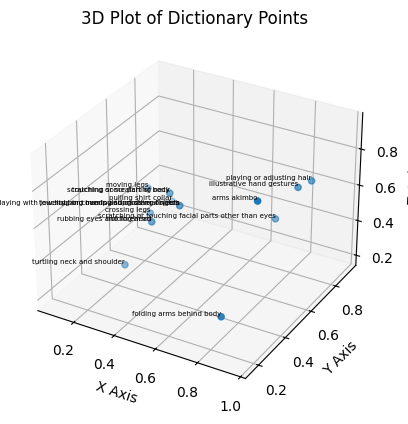

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Example dictionary with 3D points
# points_dict = {
#     k[0] : df[df['word'] == v][['x', 'y','z']].values.flatten() for k, v in smg_mapping.items()
# }

# Extracting points
keys = list(points_dict.keys())
x_vals, y_vals, z_vals = zip(*points_dict.values())

# Creating 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(x_vals, y_vals, z_vals, marker='o')

# Annotate points with dictionary keys
for key, (x, y, z) in points_dict.items():
    ax.text(x, y, z, key, fontsize=5, verticalalignment='bottom', horizontalalignment='right')

# Labels and title
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("3D Plot of Dictionary Points")

# Show plot
plt.show()


In [101]:
points_dict.pop('folding arms')

array([], dtype=float64)

In [34]:
import json

with open('data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [14]:
df = pd.read_csv(file_path, sep = '\t', header=None, names=["word", "x", "y", "z"])

In [32]:
df_imigue = set(list(mapping['IMIGUE'].values()))

AttributeError: 'dict_values' object has no attribute 'lower'

In [38]:
def parse_emotion_mapping(dataset_dict):
    """
    Parses a nested dictionary of datasets where each dataset contains micro gestures and their corresponding emotions.
    
    :param dataset_dict: Dictionary {dataset_name: {gesture: emotion}}
    :return: Flattened dictionary {gesture: emotion}
    """

    

    return word_to_emotion

In [40]:
parse_emotion_mapping(data)

AttributeError: 'str' object has no attribute 'items'

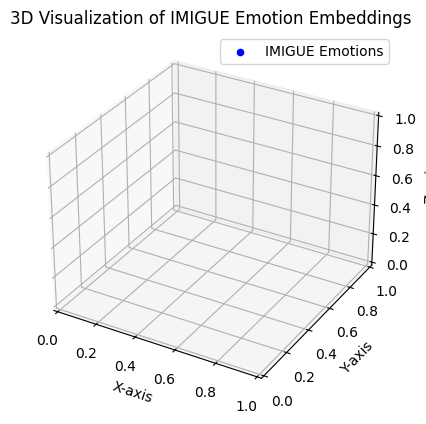

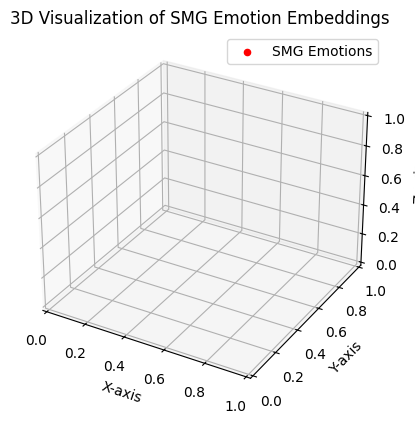

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mapping = {key: value.lower() if isinstance(value, str) else value for key, value in data.items()}

# Read the text file
file_path = "NRC-VAD-Lexicon.txt"
df = pd.read_csv(file_path, sep = '\t', header=None, names=["word", "x", "y", "z"])

# Normalize words for better mapping (convert to lowercase)
# df["word"] = df["word"].str.lower()

# Create a new column that maps words to emotions
def map_to_emotion(word):
    for dataset in mapping.values():
        if word in dataset:
            return dataset[word]
    return None  # If the word is not found in our datasets

df["emotion"] = df["word"].apply(map_to_emotion)

# Filter the data for emotions
df_filtered = df.dropna(subset=["emotion"])

# Separate IMIGUE and SMG datasets
df_imigue = df_filtered[df_filtered["emotion"].isin(mapping["IMIGUE"].values())]
df_smg = df_filtered[df_filtered["emotion"].isin(mapping["SMG"].values())]

# Plot 3D Embeddings for IMIGUE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_imigue["x"], df_imigue["y"], df_imigue["z"], c='blue', label="IMIGUE Emotions")
ax.set_title("3D Visualization of IMIGUE Emotion Embeddings")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

# Plot 3D Embeddings for SMG
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_smg["x"], df_smg["y"], df_smg["z"], c='red', label="SMG Emotions")
ax.set_title("3D Visualization of SMG Emotion Embeddings")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

In [28]:
list(mapping.values())[0]

{'Turtle neck': 'Fear',
 'Bulging face, deep breath': 'Anger',
 'Touching hat': 'Nervousness',
 'Touching or scratching head': 'Indecision',
 'Touching or scratching forehead': 'Stress',
 'Rubbing eyes': 'Discomfort',
 'Touching face': 'Anxiety',
 'Touching ears': 'Discomfort',
 'Biting nails': 'Anxiety',
 'Touching jaw': 'Anger',
 'Touching or scratching neck': 'Anxiety',
 'Playing or adjusting hair': 'Attraction',
 'Buckle button, pulling shirt collar, adjusting tie': 'Anxiety',
 'Touching or covering suprasternal notch': 'Fear',
 'Scratching back': 'Discomfort',
 'Folding arms': 'Defensiveness',
 'Dusting off clothes': 'Contempt',
 'Putting arms behind body': 'Confidence',
 'Moving torso': 'Nervousness',
 'Sitting straightly': 'Confidence',
 'Scratching or touching arms': 'Anxiety',
 'Rubbing or holding hands': 'Stress',
 'Crossing fingers': 'Indecision',
 'Minaret gesture': 'Dominance',
 'Playing or manipulating objects': 'Anxiety',
 'Hold back arms': 'Submission',
 'Head up': 'Con

## Legacy

In [ ]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="<OPENROUTER_API_KEY>",
)

completion = client.chat.completions.create(
  extra_headers={
    "HTTP-Referer": "<YOUR_SITE_URL>", # Optional. Site URL for rankings on openrouter.ai.
    "X-Title": "<YOUR_SITE_NAME>", # Optional. Site title for rankings on openrouter.ai.
  },
  model="google/gemini-2.0-flash-thinking-exp:free",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What's in this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
          }
        }
      ]
    }
  ]
)
print(completion.choices[0].message.content)

In [ ]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="<OPENROUTER_API_KEY>",
)

completion = client.chat.completions.create(
  extra_headers={
    "HTTP-Referer": "<YOUR_SITE_URL>", # Optional. Site URL for rankings on openrouter.ai.
    "X-Title": "<YOUR_SITE_NAME>", # Optional. Site title for rankings on openrouter.ai.
  },
  model="deepseek/deepseek-r1:free",
  messages=[
    {
      "role": "user",
      "content": "What is the meaning of life?"
    }
  ]
)
print(completion.choices[0].message.content)

In [5]:
import os
os.environ.get("OPENAI_API_KEY")

In [ ]:
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